# Análise dos Datasets

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dfp = pd.read_csv("../data/pessoas_completo_limpo.csv")
dfs = pd.read_csv("../data/sinistros_completo_limpo.csv")
dfv = pd.read_csv("../data/veiculos_completo_limpo.csv")

In [3]:
dfs["tipo_acidente_primario"].value_counts()

COLISAO           498994
OUTROS            448009
ATROPELAMENTO     117179
NAO DISPONIVEL     95723
CHOQUE             81038
Name: tipo_acidente_primario, dtype: int64

Como em todos os dataframes há uma quantidade muito menor de registros nos anos entre 2014-2018, e 2025 por ainda estar em andamento, terão seus valores desconsiderados para que a análise seja mais confiável no período estudado

In [4]:
#(dfp["ano_sinistro"] < 2019).sum()
dfp = dfp[(dfp["ano_sinistro"] >= 2019) & (dfp["ano_sinistro"] < 2025)]
dfs = dfs[(dfs["ano_sinistro"] >= 2019) & (dfs["ano_sinistro"] < 2025)]
dfv = dfv[(dfv["ano_sinistro"] >= 2019) & (dfv["ano_sinistro"] < 2025)]

In [20]:
dfp.head()

,id_sinistro,municipio,tipo_via,tipo_veiculo_vitima,sexo,idade,gravidade_lesao,tipo_vitima,faixa_etaria_legal,profissao,ano_sinistro,mes_sinistro,dia_sinistro,ano_obito,mes_obito,dia_obito
16120,1617599,SAO PAULO,RODOVIAS,NaN,FEMININO,23,LEVE,NAO DISPONIVEL,18-24,AUXILIAR DE COZINHA,2019,Jan,1,NaN,NaN,NaN
16121,2468144,JALES,RODOVIAS,AUTOMOVEL,MASCULINO,12,FATAL,PASSAGEIRO,0-17,ESTUDANTE,2019,Jan,1,2019.0,Jan,9.0
16122,1512776,MOGI MIRIM,RODOVIAS,NaN,MASCULINO,20,GRAVE,CONDUTOR,18-24,ADMINISTRADOR(A),2019,Jan,1,NaN,NaN,NaN
16123,1681915,SAO PAULO,VIAS MUNICIPAIS,NaN,MASCULINO,11,NAO DISPONIVEL,NAO DISPONIVEL,0-17,DESCONHECIDA,2019,Jan,1,NaN,NaN,NaN
16124,1790614,SAO VICENTE,RODOVIAS,NaN,FEMININO,17,LEVE,NAO DISPONIVEL,0-17,ESTUDANTE,2019,Jan,1,NaN,NaN,NaN


In [19]:
dfv["tipo_veiculo"].value_counts()

AUTOMOVEL         559250
MOTOCICLETA       471103
NAO DISPONIVEL    174644
CAMINHAO           49110
BICICLETA          28834
ONIBUS             27451
OUTROS             17642
Name: tipo_veiculo, dtype: int64

### Quantidade de acidentes por ano

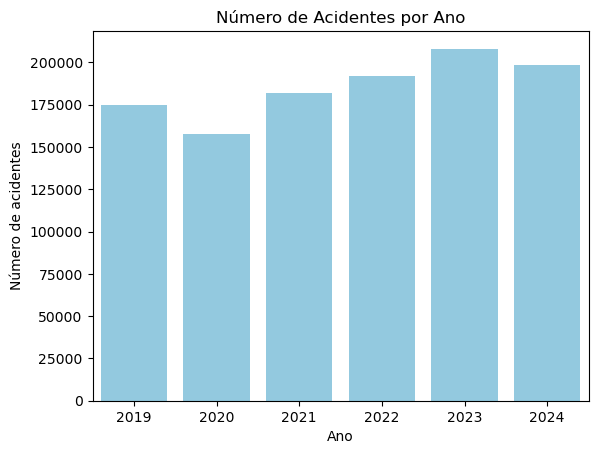

In [7]:
sns.countplot(data=dfs, x="ano_sinistro", color="skyblue")
plt.title("Número de Acidentes por Ano")
plt.xlabel("Ano")
plt.ylabel("Número de acidentes")

plt.show()

Visível no gráfico acima que 2020 foi o ano com menos acidentes entre os mostrados, o que pode ser explicado pela covid que diminuiu drasticamente o tráfego de veículos nas ruas. Outra informação visível é o aumento crescente de acidentes nos últimos anos, que pode ser explicado por uma possível crescente de veículos transitando nas ruas.

### Quantidade de acidentes por hora

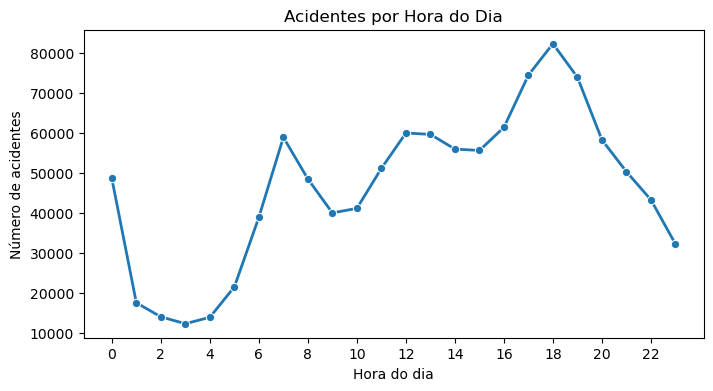

In [8]:
plt.figure(figsize=(8, 4))
accident_hour = dfs["hora_sinistro"].dropna().astype(int).value_counts().sort_index()
sns.lineplot(x=accident_hour.index, y=accident_hour.values, marker="o", linewidth=2)

plt.title("Acidentes por Hora do Dia")
plt.xlabel("Hora do dia")
plt.ylabel("Número de acidentes")
plt.xticks(range(0, 24, 2))

plt.show()

No gráfico de acidentes por hora do dia é possível verificar que os horários com maior quantidade de acidentes é entre as 16h e 20h, justamente o horário de pico de veículos nas ruas, porém também digno de nota a quantidade muito inferior de acidentes no horário de pico da manhã, das 6h às 8h. Mostrando que uma possível causa dos acidentes possa ser o cansaço físico/mental do condutor ao volante.

### Quantidade de envolvidos em acidentes por faixa etária

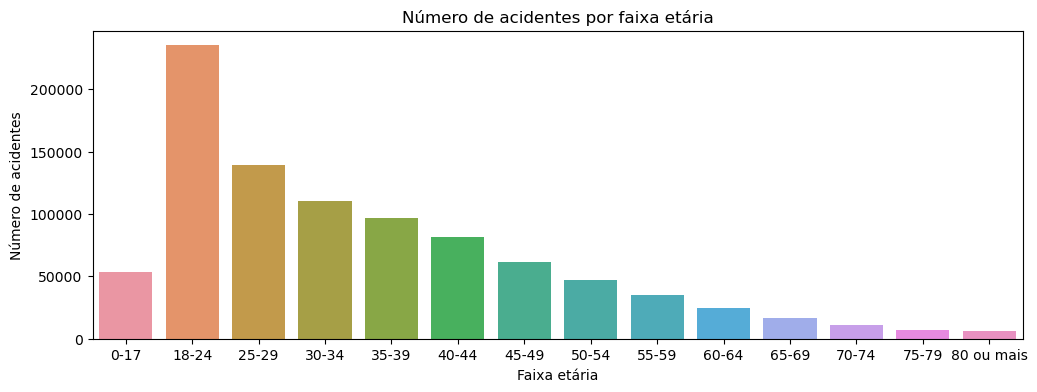

In [15]:
etary_order = [
    "0-17","18-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50-54",
    "55-59", "60-64", "65-69", "70-74", "75-79", "80 ou mais"
]
plt.figure(figsize=(12, 4))
sns.countplot(data=dfp, x="faixa_etaria_legal", order=etary_order)

plt.title("Número de acidentes por faixa etária")
plt.xlabel("Faixa etária")
plt.ylabel("Número de acidentes")

plt.show()

Nesse gráfico é mostrado como há um decréscimo de acidentes a cada faixa etária mostrando que a maioria dos acidentes decorrem de motoristas mais jovens, seja pela maior quantidade de motoristas dessas faixas etárias em relação às outras nas ruas ou pela menor expêriencia em frente ao volante.

### Proporção de acidentes por tipo de via

In [10]:
df_ps = pd.merge(dfp, dfs, on="id_sinistro", how="inner")
df_ps = df_ps[df_ps["tipo_via_x"] != "NAO DISPONIVEL"]

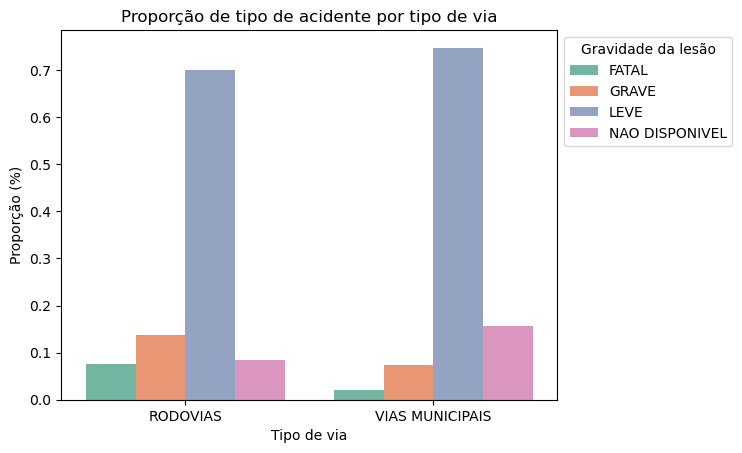

In [11]:
df_proportional = df_ps.groupby(["tipo_via_x", "gravidade_lesao"]).size().reset_index(name="contagem")
df_proportional["proporcao"] = df_proportional.groupby("tipo_via_x")["contagem"].transform(lambda x: x/x.sum())

sns.barplot(data=df_proportional, x="tipo_via_x", y="proporcao", hue="gravidade_lesao", palette="Set2")

plt.title("Proporção de tipo de acidente por tipo de via")
plt.xlabel("Tipo de via")
plt.ylabel("Proporção (%)")
plt.legend(title="Gravidade da lesão", bbox_to_anchor=(1, 1))

plt.show()

Por esse gráfico podemos observar que há uma proporção maior de acidentes graves e fatais em rodovias do que em vias municipais, podendo ser atribuída pela alta velocidade dos carros em rodovias.

### Mapa de calor de acidentes por mês por ano

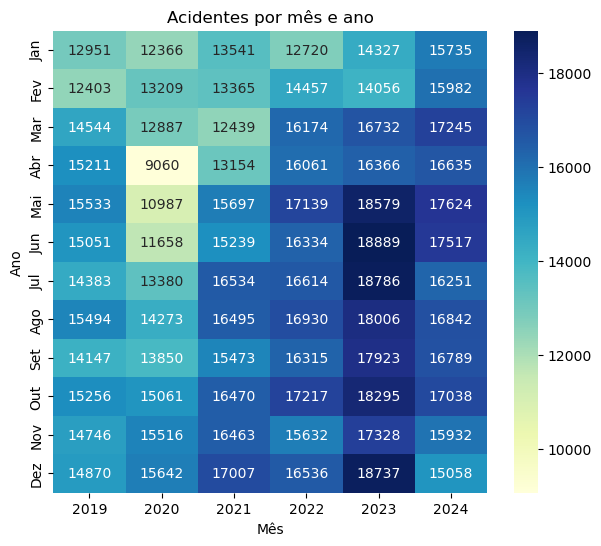

In [16]:
month_order = ["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", "Jul", "Ago", "Set", "Out", "Nov", "Dez"]
dfs["mes_sinistro"] = pd.Categorical(dfs["mes_sinistro"], categories=month_order, ordered=True)

accidents_y_m = dfs.groupby(["ano_sinistro", "mes_sinistro"]).size().reset_index(name="acidentes")
accidents_y_m_pivot = accidents_y_m.pivot(index="mes_sinistro", columns="ano_sinistro", values="acidentes")

plt.figure(figsize=(7, 6))
sns.heatmap(accidents_y_m_pivot, annot=True, fmt=".0f", cmap="YlGnBu")

plt.title("Acidentes por mês e ano")
plt.xlabel("Mês")
plt.ylabel("Ano")

plt.show()

No heatmap é visível como o período entre março e outubro são os meses onde mais ocorrem acidentes no ano, com a exceção de 2020, onde podemos observar um comportamento contrária do que ocorre nos outros anos explicado pelo fato da quarentena da covid ter sido iniciada em março, causando uma grande diminuição de acidentes nos meses subsequentes. Outro ponto interessante para destacar é como dezembro é um mês com muitos acidentes, que pode ser casuado pelo maior tráfego de veículos noas festas de fim de ano.

### Idade por tipo de veículo

In [ ]:
df_pv = pd.merge(df_p, df_v, on="id_sinistro", how=inner)

In [ ]:
sns.boxplot(data=df_pv, x="tipo_veiculo", y="idade")